RF-DETR is a real-time, transformer-based object detection model architecture developed by Roboflow and released under the Apache 2.0 license.

More info: https://rfdetr.roboflow.com/

# Config env

In [1]:
!pip install rfdetr supervision roboflow

### Configure API Key

To fine-tune RF-DETR, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy` to copy your private API key.
- In Colab, go to the left pane and click on `Secrets` (🔑).
    - Store your Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [2]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

### Check GPU availability

In [3]:
!nvidia-smi

Sun Jan  4 19:55:46 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Load model and check inference

Simply check if everything is working fine before more work

Runs inference on an example image using a pretrained RF-DETR Medium model (trained on COCO). To use a different model size, simply replace RFDETRMedium with RFDETRNano, RFDETRSmall, RFDETRBase or RFDETRLarge as needed.

In [4]:
# !wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
# !wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg

In [5]:
# import numpy as np
# import supervision as sv

# from PIL import Image

# from rfdetr import RFDETRMedium
# from rfdetr.util.coco_classes import COCO_CLASSES

# image = Image.open("dog-2.jpeg")

# model = RFDETRMedium(resolution=640)
# # model.optimize_for_inference()

# detections = model.predict(image, threshold=0.5)

# color = sv.ColorPalette.from_hex([
#     "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
#     "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
# ])
# text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
# thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

# bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
# label_annotator = sv.LabelAnnotator(
#     color=color,
#     text_color=sv.Color.BLACK,
#     text_scale=text_scale,
#     smart_position=True
# )

# labels = [
#     f"{COCO_CLASSES[class_id]} {confidence:.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]

# annotated_image = image.copy()
# annotated_image = bbox_annotator.annotate(annotated_image, detections)
# annotated_image = label_annotator.annotate(annotated_image, detections, labels)
# annotated_image.thumbnail((800, 800))
# annotated_image

# Prepare data

Dataset of license plates provided by Roboflow, licensed under CC BY 4.0.

In [6]:
from roboflow import download_dataset

dataset = download_dataset("https://universe.roboflow.com/augmented-startups/vehicle-registration-plates-trudk/dataset/1", "coco")


loading Roboflow workspace...
loading Roboflow project...


# Finetuning

### Downlad model weights

In [13]:
from rfdetr import RFDETRNano

model = RFDETRNano()

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


#### Authors giving advise about bach size:
Choose the right batch_size
Different GPUs have different amounts of VRAM (video memory), which limits how much data they can handle at once during training. To make training work well on any machine, you can adjust two settings: batch_size and grad_accum_steps. These control how many samples are processed at a time. The key is to keep their product equal to 16 — that’s our recommended total batch size. For example, on powerful GPUs like the A100, set batch_size=16 and grad_accum_steps=1. On smaller GPUs like the T4, use batch_size=4 and grad_accum_steps=4. We use a method called gradient accumulation, which lets the model simulate training with a larger batch size by gradually collecting updates before adjusting the weights.

In [14]:
model.train(dataset_dir=dataset.location, epochs=4, batch_size=4, grad_accum_steps=4)

TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=2, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=4, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-nano.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=2, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=16

Epoch: [0]  [  0/386]  eta: 0:22:26  lr: 0.000100  class_error: 0.00  loss: 15.8747 (15.8747)  loss_ce: 2.9382 (2.9382)  loss_bbox: 0.6304 (0.6304)  loss_giou: 1.5318 (1.5318)  loss_ce_0: 3.0721 (3.0721)  loss_bbox_0: 0.6928 (0.6928)  loss_giou_0: 1.6494 (1.6494)  loss_ce_enc: 2.6110 (2.6110)  loss_bbox_enc: 0.8586 (0.8586)  loss_giou_enc: 1.8904 (1.8904)  loss_ce_unscaled: 2.9382 (2.9382)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.1261 (0.1261)  loss_giou_unscaled: 0.7659 (0.7659)  cardinality_error_unscaled: 46.7500 (46.7500)  loss_ce_0_unscaled: 3.0721 (3.0721)  loss_bbox_0_unscaled: 0.1386 (0.1386)  loss_giou_0_unscaled: 0.8247 (0.8247)  cardinality_error_0_unscaled: 12.7500 (12.7500)  loss_ce_enc_unscaled: 2.6110 (2.6110)  loss_bbox_enc_unscaled: 0.1717 (0.1717)  loss_giou_enc_unscaled: 0.9452 (0.9452)  cardinality_error_enc_unscaled: 22.2500 (22.2500)  time: 3.4878  data: 0.8738  max mem: 13579
Epoch: [0]  [ 10/386]  eta: 0:15:28  lr: 0.000100  class_error: 0.0

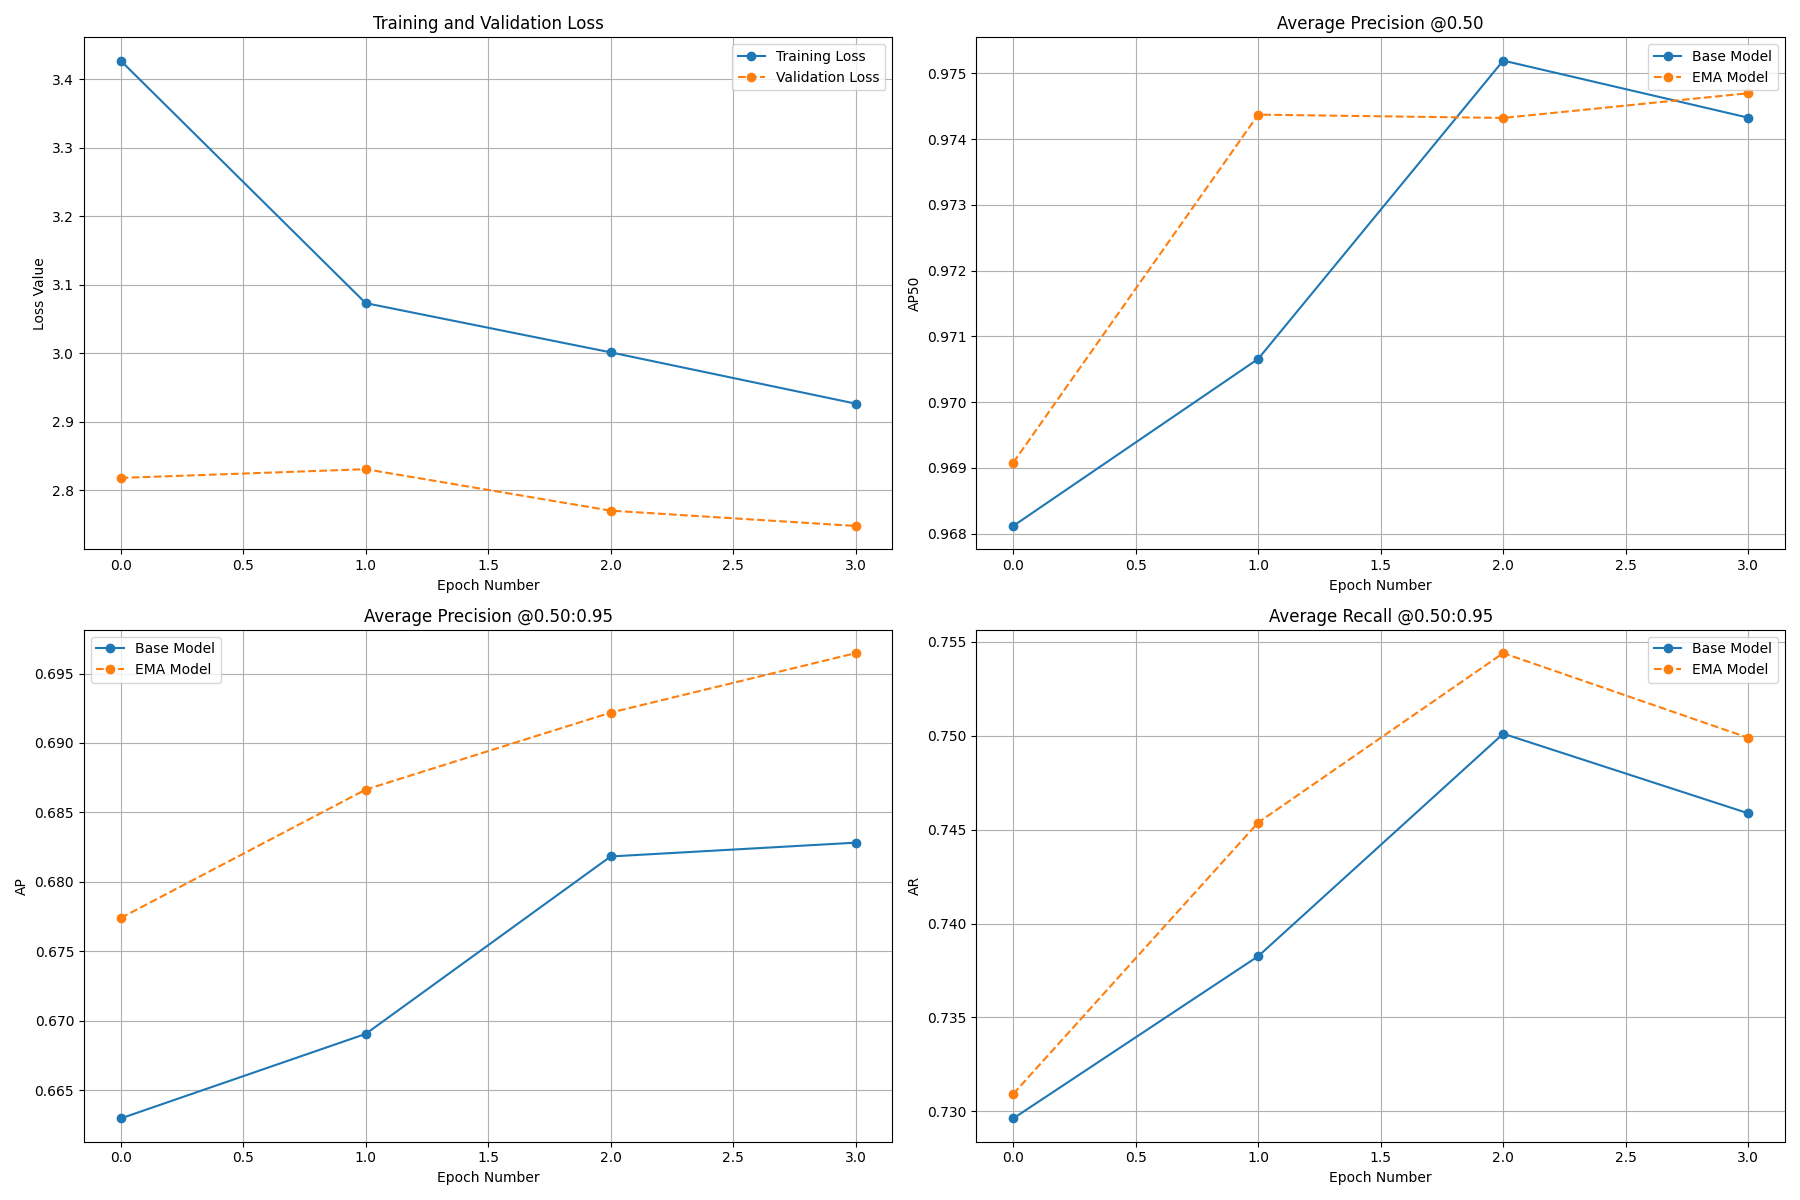

In [15]:
from PIL import Image

Image.open("/content/output/metrics_plot.png")

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
import shutil

# Ścieżka źródłowa w Colab
src_folder = '/content/output'

# Ścieżka docelowa w Drive
dst_folder = '/content/drive/MyDrive/car_plates_recognition/finetuning/rf-detr_nano'

# Kopiowanie folderu
shutil.copytree(src_folder, dst_folder)

'/content/drive/MyDrive/car_plates_recognition/finetuning/rf-detr_nano'

In [11]:
import gc
import torch
import weakref

def cleanup_gpu_memory(obj=None, verbose: bool = False):

    if not torch.cuda.is_available():
        if verbose:
            print("[INFO] CUDA is not available. No GPU cleanup needed.")
        return

    def get_memory_stats():
        allocated = torch.cuda.memory_allocated()
        reserved = torch.cuda.memory_reserved()
        return allocated, reserved

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[Before] Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

    # Ensure we drop all strong references
    if obj is not None:
        ref = weakref.ref(obj)
        del obj
        if ref() is not None and verbose:
            print("[WARNING] Object not fully garbage collected yet.")

    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[After]  Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

In [12]:
cleanup_gpu_memory(model, verbose=True)

[Before] Allocated: 7227.88 MB | Reserved: 10026.00 MB
[WARNING] Object not fully garbage collected yet.
[After]  Allocated: 504.22 MB | Reserved: 1882.00 MB
